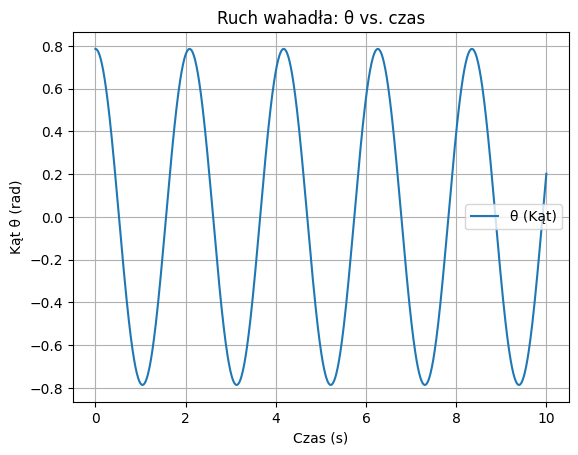

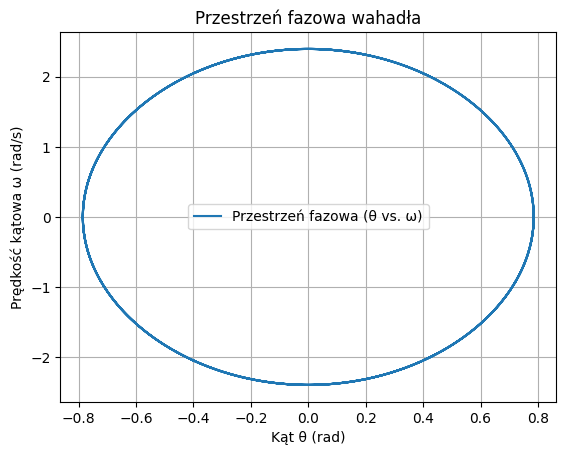

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja układu równań dla wahadła
def pendulum(state, t, params):
    theta, omega = state  # Rozpakowanie zmiennych stanu: theta i omega
    g_over_l = params  # Stała g/l (przyspieszenie ziemskie / długość wahadła)
    dtheta_dt = omega  # d(theta)/dt = omega
    domega_dt = -np.sin(theta) * g_over_l  # d(omega)/dt = -sin(theta) * g/l
    return np.array([dtheta_dt, domega_dt])

# Solver ODE (Runge-Kutta 4. rzędu)
def solve_ode_system(func, initial_state, t_start, t_finish, steps, params):
    dt = (t_finish - t_start) / steps
    data = [initial_state]
    t = t_start

    for _ in range(steps):
        current_state = data[-1]
        k1 = dt * func(current_state, t, params)
        k2 = dt * func(current_state + 0.5 * k1, t + 0.5 * dt, params)
        k3 = dt * func(current_state + 0.5 * k2, t + 0.5 * dt, params)
        k4 = dt * func(current_state + k3, t + dt, params)
        next_state = current_state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        data.append(next_state)
        t += dt

    return np.array(data)

# Parametry symulacji
g_over_l = 9.8 / 1.0  # Przyspieszenie ziemskie g = 9.8 m/s^2, długość l = 1 m
initial_state = [np.pi / 4, 0.0]  # Początkowy kąt 45° (pi/4 rad), prędkość kątowa = 0
t_start = 0
t_finish = 10  # Czas symulacji (10 sekund)
steps = 1000

# Rozwiąż równania różniczkowe
time = np.linspace(t_start, t_finish, steps + 1)  # Dopasowanie liczby punktów do rozwiązania
solution = solve_ode_system(pendulum, initial_state, t_start, t_finish, steps, g_over_l)

# Rozpakowanie wyników
theta = solution[:, 0]
omega = solution[:, 1]

# Wykres theta (kąt) w funkcji czasu
plt.figure()
plt.plot(time, theta, label="θ (Kąt)")
plt.xlabel("Czas (s)")
plt.ylabel("Kąt θ (rad)")
plt.title("Ruch wahadła: θ vs. czas")
plt.legend()
plt.grid()

# Wykres przestrzeni fazowej (θ vs. ω)
plt.figure()
plt.plot(theta, omega, label="Przestrzeń fazowa (θ vs. ω)")
plt.xlabel("Kąt θ (rad)")
plt.ylabel("Prędkość kątowa ω (rad/s)")
plt.title("Przestrzeń fazowa wahadła")
plt.legend()
plt.grid()

plt.show()
